In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

C:\Users\jfraz\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(columns = ['EIN'])

In [3]:
# Determine the number of unique values in each column.
for x in application_df.columns:
    print(x, len(application_df[x].unique()))

NAME 19568
APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [4]:
# Look at NAME counts for binning
counts1 = application_df['NAME'].value_counts()
counts1.head()

PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
Name: NAME, dtype: int64

In [5]:
# Choose a cutoff value and create a list of names_replace to be replaced
# use the variable name names_replace
names_replace = list(counts1[counts1<5].index)
names_replace

['AMALGAMATED TRANSIT UNION',
 '4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS',
 'TEXAS WATER UTILITIES ASSOCIATION',
 'PARENTS FAMILIES AND FRIENDS OF LESBIANS AND GAYS INC',
 'THE UNITED STATE PONY CLUBS INC',
 'WESTERN GOVERNORS UNIVERSITY',
 'AMERICAN ORFF-SCHULWERK ASSOCIATION',
 'GAMMA PHI BETA SORORITY INC',
 'AMATEUR ATHLETIC UNION OV THE UNITED STATES INC',
 'DEPARTMENT OF OKLAHOMA LADIES AUXILIARY TO THE VFW INC',
 'PILOT CLUB INTERNATIONAL',
 'DELTA CHI NATIONAL HOUSING CORPORATION',
 'SOROPTIMIST INTERNATIONAL TO THE AMERICAS INC',
 'WOODMEN OF THE WORLD LIFE INSURANCE SOCIETY',
 'COMMUNICATION ALLIANCE TO NETWORK THOROUGHBRED EX-RACEHORSES',
 'BLUE STAR MOTHERS OF AMERICA INC',
 'MUSIC TEACHERS NATIONAL ASSOCIATION',
 'YOUNG CATHOLIC PROFESSIONALS',
 'METHODIST RETIREMENT COMMUNITIES',
 'PTA NEW MEXICO CONGRESS',
 'UNITED MINE WORKERS OF AMERICA- INTERNATIONAL',
 'TEXAS EXTENSION EDUCATION ASSOCIATION',
 'VESTAVIA HILLS PARENT TEACHER ORGANIZATION INC',
 'INTERNATIONAL ASSOCIAT

In [6]:
# Replace in dataframe
for name in names_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: NAME, Length: 403, dtype: int64

In [7]:
# Look at APPLICATION TYPE counts for binning
counts = application_df['APPLICATION_TYPE'].value_counts()
counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(counts[counts<750].index)
application_types_to_replace

['T8',
 'T7',
 'T10',
 'T9',
 'T13',
 'T12',
 'T2',
 'T25',
 'T14',
 'T29',
 'T15',
 'T17']

In [9]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
countsbinning = application_df['CLASSIFICATION'].value_counts()

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
countsclassification = countsbinning[countsbinning>1]
countsclassification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list (countsbinning[countsbinning<350].index)
classifications_to_replace

['C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [13]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop('IS_SUCCESSFUL', axis=1).values

In [16]:
# drop 'IS SUCCESSFUL'
#X = application_df.drop('IS_SUCCESSFUL', axis=1).values


In [17]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=20
hidden_nodes_layer2=40
hidden_nodes_layer3=60
nn = tf.keras.models.Sequential()

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                8900      
                                                                 
 dense_1 (Dense)             (None, 40)                840       
                                                                 
 dense_2 (Dense)             (None, 60)                2460      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 12,261
Trainable params: 12,261
Non-trainable params: 0
_________________________________________________________________


In [20]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#checkpoint path and filename 
os.makedirs('optimizecheckpoints/',exist_ok= True)
checkpoint_path = 'optimizecheckpoints/weights.{epoch:05d}.hdf5'

In [21]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [22]:
cpcallback= ModelCheckpoint(filepath =checkpoint_path,verbose=5,save_weights_only=True, period =5)

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=150,callbacks=[cpcallback])

Epoch 1/150
804/804 [==============================] - 3s 2ms/step - loss: 0.4827 - accuracy: 0.7695
Epoch 2/150
804/804 [==============================] - 1s 2ms/step - loss: 0.4298 - accuracy: 0.7954
Epoch 3/150
804/804 [==============================] - 1s 2ms/step - loss: 0.4248 - accuracy: 0.7978
Epoch 4/150
804/804 [==============================] - 1s 2ms/step - loss: 0.4221 - accuracy: 0.7980
Epoch 5/150
774/804 [===========================>..] - ETA: 0s - loss: 0.4209 - accuracy: 0.7995
Epoch 5: saving model to optimizecheckpoints\weights.00005.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.4206 - accuracy: 0.7997
Epoch 6/150
804/804 [==============================] - 2s 2ms/step - loss: 0.4199 - accuracy: 0.7991
Epoch 7/150
804/804 [==============================] - 2s 3ms/step - loss: 0.4183 - accuracy: 0.8005
Epoch 8/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4175 - accuracy: 0.8015
Epoch 9/150
804/804 [======================

804/804 [==============================] - 2s 3ms/step - loss: 0.4022 - accuracy: 0.8087
Epoch 64/150
804/804 [==============================] - 3s 3ms/step - loss: 0.4015 - accuracy: 0.8086
Epoch 65/150
803/804 [============================>.] - ETA: 0s - loss: 0.4016 - accuracy: 0.8081
Epoch 65: saving model to optimizecheckpoints\weights.00065.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.4016 - accuracy: 0.8082
Epoch 66/150
804/804 [==============================] - 3s 3ms/step - loss: 0.4017 - accuracy: 0.8078
Epoch 67/150
804/804 [==============================] - 2s 3ms/step - loss: 0.4018 - accuracy: 0.8083
Epoch 68/150
804/804 [==============================] - 2s 2ms/step - loss: 0.4012 - accuracy: 0.8088
Epoch 69/150
804/804 [==============================] - 2s 2ms/step - loss: 0.4011 - accuracy: 0.8082
Epoch 70/150
790/804 [============================>.] - ETA: 0s - loss: 0.4008 - accuracy: 0.8084
Epoch 70: saving model to optimizecheckpoints\weigh

774/804 [===========================>..] - ETA: 0s - loss: 0.3985 - accuracy: 0.8096
Epoch 125: saving model to optimizecheckpoints\weights.00125.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.3981 - accuracy: 0.8101
Epoch 126/150
804/804 [==============================] - 1s 1ms/step - loss: 0.3980 - accuracy: 0.8103
Epoch 127/150
804/804 [==============================] - 1s 1ms/step - loss: 0.3976 - accuracy: 0.8105
Epoch 128/150
804/804 [==============================] - 1s 1ms/step - loss: 0.3972 - accuracy: 0.8110
Epoch 129/150
804/804 [==============================] - 2s 2ms/step - loss: 0.3971 - accuracy: 0.8108
Epoch 130/150
804/804 [==============================] - ETA: 0s - loss: 0.3978 - accuracy: 0.8105
Epoch 130: saving model to optimizecheckpoints\weights.00130.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.3978 - accuracy: 0.8105
Epoch 131/150
804/804 [==============================] - 3s 3ms/step - loss: 0.3982 - accuracy

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4603 - accuracy: 0.7854 - 391ms/epoch - 1ms/step
Loss: 0.4603050649166107, Accuracy: 0.7854227423667908


<AxesSubplot:>

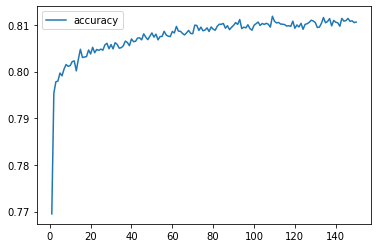

In [25]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [26]:
# Export our model to HDF5 file
nn.save('./Resources/AlphabetSoupCharity_Optimization.h5')